Generator and Discriminator Created.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


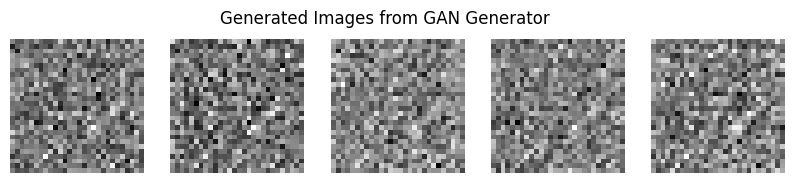

In [2]:
#-------------------------------------------------------------------------
# Classical GAN Architecture 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
#-------------------------------------------------------------------------

def create_generator():
    """ Generator model """
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=100),
        layers.Dense(256, activation='relu'),
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))  # Reshape to 28x28 images
    ])
    return model
#-------------------------------------------------------------------------

def create_discriminator():
    """ Discriminator model """
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Ensure correct input shape
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model
#-------------------------------------------------------------------------

def generate_noise(batch_size=5, latent_dim=100):
    """ Generate random noise """
    return np.random.normal(0, 1, (batch_size, latent_dim))
#-------------------------------------------------------------------------

def generate_and_plot_images(generator, num_images=5):
    """ Generate sample images from random noise """
    noise = generate_noise(num_images)
    generated_images = generator.predict(noise)

    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle("Generated Images from GAN Generator", fontsize=12)
    plt.show()
#-------------------------------------------------------------------------
    
# Instantiate models
generator     = create_generator()
discriminator = create_discriminator()
print("Generator and Discriminator Created.")
    
# Generate and plot images from the generator
generate_and_plot_images(generator)
